# Customer Segmentation Using RFM

In [37]:
import pandas as pd # data processing, read data
import numpy as np # linear algebra

import requests
from io import StringIO

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt # time module

# Import Data

In [2]:
df = pd.read_csv('sales_transaction.csv')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


# Data Preparation

In [50]:
df.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [3]:
df.dropna(axis=0, inplace=True)

In [5]:
df.dtypes

TransactionNo     object
Date              object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object

In [4]:
df.drop(['TransactionNo', 'ProductNo'], axis= 1, inplace=True)
df.head()

,Date,ProductName,Price,Quantity,CustomerNo,Country
0,12/9/2019,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,12/9/2019,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,12/9/2019,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,12/9/2019,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,12/9/2019,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [5]:
df['CustomerNo'] = df['CustomerNo'].astype(int) 

In [6]:
df['Monetary'] = df['Price'] * df['Quantity']
df.head()

,Date,ProductName,Price,Quantity,CustomerNo,Country,Monetary
0,12/9/2019,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom,257.64
1,12/9/2019,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom,383.40
2,12/9/2019,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom,138.36
3,12/9/2019,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom,127.80
4,12/9/2019,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom,71.64


In [7]:
df['Date'] = pd.DatetimeIndex(df['Date']).date

In [147]:
df.head()

,Date,ProductName,Price,Quantity,CustomerNo,Country,Monetary
0,2019-12-09,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom,257.64
1,2019-12-09,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom,383.40
2,2019-12-09,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom,138.36
3,2019-12-09,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom,127.80
4,2019-12-09,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom,71.64


# RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

 - RECENCY (R): Days since last purchase
 - FREQUENCY (F): Total number of purchases
 - MONETARY VALUE (M): Total money this customer spent.

# Recency

In [103]:
df['Date'].min()

datetime.date(2018, 12, 1)

In [104]:
df['Date'].max()

datetime.date(2019, 12, 9)

In [8]:
date_now = dt.date(2019, 12, 10)

In [9]:
df_recency = df.groupby(['CustomerNo'])['Date'].max().reset_index()
df_recency.columns = ['CustomerNo', 'LastPuchaseDate']
df_recency.head()

,CustomerNo,LastPuchaseDate
0,12004,2019-04-26
1,12006,2019-05-05
2,12008,2019-03-08
3,12013,2018-12-15
4,12024,2019-06-16


In [10]:
df_recency['Recency'] = df_recency['LastPuchaseDate'].apply(lambda x: (date_now - x).days)
df_recency.drop('LastPuchaseDate', axis= 1, inplace=True)

In [132]:
df_recency.head()

,CustomerNo,Recency
0,12004,228
1,12006,219
2,12008,277
3,12013,360
4,12024,177


# Frequency

Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [34]:
df_frequency = df.groupby('CustomerNo').size().reset_index()
df_frequency.columns = ['CustomerNo', 'Frequency']
df_frequency.head()

,CustomerNo,Frequency
0,12004,56
1,12006,1
2,12008,203
3,12013,1
4,12024,5


# Monetary

Monetary attribute answers the question: How much money did the customer spent over time?

In [11]:
df_monetary = df.groupby('CustomerNo')['Monetary'].sum().reset_index()
df_monetary.head()

,CustomerNo,Monetary
0,12004,1509.60
1,12006,24.76
2,12008,5689.57
3,12013,69.96
4,12024,149.52


# Create RFM Table

In [13]:
df_tmp = df_recency.merge(df_frequency) #merge recency dataframe with frequency dataframe
df_rfm = df_tmp.merge(df_monetary).set_index('CustomerNo') #merge again with monetary

In [154]:
df_rfm.head(10)

,Recency,Frequency,Monetary
CustomerNo,,,
12004,228,56,1509.60
12006,219,1,24.76
12008,277,203,5689.57
12013,360,1,69.96
12024,177,5,149.52
12025,288,46,1021.59
12026,340,409,20486.32
12031,71,7,136.18
12042,265,223,6296.77


# Check RFM table validation

In [156]:
df[df['CustomerNo'] == 12024]	

,Date,ProductName,Price,Quantity,CustomerNo,Country,Monetary
309301,2019-06-16,Vintage Caravan Gift Wrap,10.68,4,12024,United Kingdom,42.72
309302,2019-06-16,Wrap Green Pears,10.68,1,12024,United Kingdom,10.68
309303,2019-06-16,Wrap Monster Fun,10.68,3,12024,United Kingdom,32.04
309304,2019-06-16,Wrap Red Apples,10.68,3,12024,United Kingdom,32.04
309305,2019-06-16,Wrap Cowboys,10.68,3,12024,United Kingdom,32.04


In [157]:
df[df['CustomerNo'] == 12006]	

,Date,ProductName,Price,Quantity,CustomerNo,Country,Monetary
362925,2019-05-05,Jumbo Storage Bag Skulls,12.38,2,12006,United Kingdom,24.76


# Build customer segments with RFM Model

The simplest way to create customers segments from RFM Model is to use ** Tertiles**. We assign a score from 1 to 3 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

# RFM Tertiles

In [14]:
tertile = df_rfm.quantile([0.33, 0.66])
tertile.to_dict()

{'Recency': {0.33: 25.0, 0.66: 97.0},
 'Frequency': {0.33: 27.0, 0.66: 92.0},
 'Monetary': {0.33: 2472.9609, 0.66: 8354.221}}

In [15]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = tertiles dict)
def RScore(x,p,d):
    if x <= d[p][0.33]:
        return 3
    elif x <= d[p][0.66]:
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = tertiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.33]:
        return 1
    elif x <= d[p][0.66]:
        return 2
    else:
        return 3

In [16]:
rfm_segmentation = df_rfm
rfm_segmentation['R_Tertile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',tertile,))
rfm_segmentation['F_Tertile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',tertile,))
rfm_segmentation['M_Tertile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',tertile,))

In [17]:
rfm_segmentation['RFM_Score'] = rfm_segmentation.R_Tertile.map(str) \
                            + rfm_segmentation.F_Tertile.map(str) \
                            + rfm_segmentation.M_Tertile.map(str)

In [35]:
rfm_segmentation.head(10)

,Recency,Frequency,Monetary,R_Tertile,F_Tertile,M_Tertile,RFM_Score,segment_name
CustomerNo,,,,,,,,
12004,228,56,1509.60,1,2,1,121,ABOUT TO SLEEP
12006,219,1,24.76,1,1,1,111,LOST CUSTOMER
12008,277,203,5689.57,1,3,2,132,CANNOT LOOSE THEM
12013,360,1,69.96,1,1,1,111,LOST CUSTOMER
12024,177,5,149.52,1,1,1,111,LOST CUSTOMER
12025,288,46,1021.59,1,2,1,121,ABOUT TO SLEEP
12026,340,409,20486.32,1,3,3,133,CANNOT LOOSE THEM
12031,71,7,136.18,2,1,1,211,ABOUT TO SLEEP
12042,265,223,6296.77,1,3,2,132,CANNOT LOOSE THEM


In [19]:
segment_name = {'112':'ABOUT TO SLEEP',
                '113':'ABOUT TO SLEEP', 
                '121':'ABOUT TO SLEEP',

                '122':'ABOUT TO SLEEP',
                '131':'ABOUT TO SLEEP', 
                '211':'ABOUT TO SLEEP',

                '212':'ABOUT TO SLEEP',
                '221':'ABOUT TO SLEEP', 

                '311':'RECENT CUSTOMER',
                '312':'RECENT CUSTOMER', 
                '313':'RECENT CUSTOMER',

                '123':'CANNOT LOOSE THEM',
                '132':'CANNOT LOOSE THEM', 
                '133':'CANNOT LOOSE THEM',

                '333':'CHAMPION',
                '111':'LOST CUSTOMER',

                '233':'LOYAL',
                '323':'LOYAL', 
                '332':'LOYAL',

                '223':'POTENTIAL LOYALIST',
                '223':'POTENTIAL LOYALIST', 
                '322':'POTENTIAL LOYALIST',
                '331':'POTENTIAL LOYALIST',

                '213':'AVERAGE',
                '222':'AVERAGE', 
                '231':'AVERAGE',
                '321':'AVERAGE'}

In [20]:
rfm_segmentation["segment_name"] = rfm_segmentation["RFM_Score"].map(segment_name)

In [21]:
rfm_segmentation.head(10)

,Recency,Frequency,Monetary,R_Tertile,F_Tertile,M_Tertile,RFM_Score,segment_name
CustomerNo,,,,,,,,
12004,228,56,1509.60,1,2,1,121,ABOUT TO SLEEP
12006,219,1,24.76,1,1,1,111,LOST CUSTOMER
12008,277,203,5689.57,1,3,2,132,CANNOT LOOSE THEM
12013,360,1,69.96,1,1,1,111,LOST CUSTOMER
12024,177,5,149.52,1,1,1,111,LOST CUSTOMER
12025,288,46,1021.59,1,2,1,121,ABOUT TO SLEEP
12026,340,409,20486.32,1,3,3,133,CANNOT LOOSE THEM
12031,71,7,136.18,2,1,1,211,ABOUT TO SLEEP
12042,265,223,6296.77,1,3,2,132,CANNOT LOOSE THEM


In [22]:
rfm_segmentation[['segment_name']].value_counts()

segment_name      
ABOUT TO SLEEP        1167
CHAMPION               707
LOST CUSTOMER          676
LOYAL                  633
AVERAGE                450
POTENTIAL LOYALIST     420
CANNOT LOOSE THEM      295
RECENT CUSTOMER        249
dtype: int64

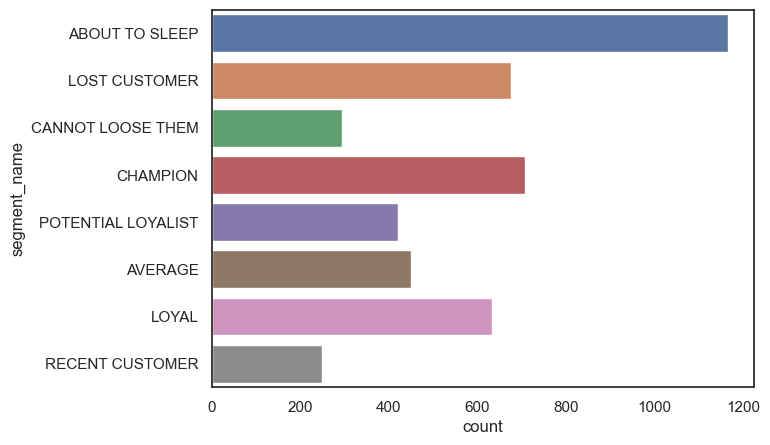

In [29]:
fig = plt.figure(figsize=(7,5), dpi= 100)
ax = sns.countplot(y="segment_name", data=rfm_segmentation)

In [174]:
rfm_segmentation.groupby('segment_name')['Monetary'].sum()

segment_name
ABOUT TO SLEEP         3856130.15
AVERAGE                2547019.77
CANNOT LOOSE THEM      3521604.91
CHAMPION              32129145.90
LOST CUSTOMER           651574.69
LOYAL                 12131600.34
POTENTIAL LOYALIST     3438078.67
RECENT CUSTOMER        1215173.55
Name: Monetary, dtype: float64

In [41]:
rfm_segmentation.groupby('segment_name')['Monetary'].sum()

segment_name
ABOUT TO SLEEP         3856130.15
AVERAGE                2547019.77
CANNOT LOOSE THEM      3521604.91
CHAMPION              32129145.90
LOST CUSTOMER           651574.69
LOYAL                 12131600.34
POTENTIAL LOYALIST     3438078.67
RECENT CUSTOMER        1215173.55
Name: Monetary, dtype: float64

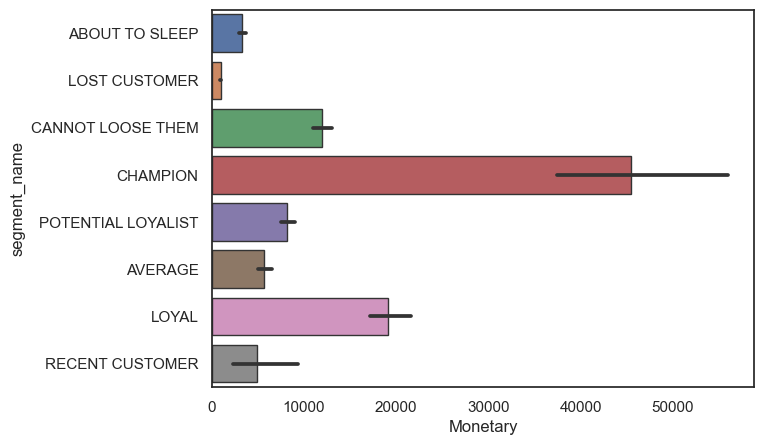

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
fig = plt.figure(figsize=(7,5), dpi= 100)
sns.set(style='white')

sns.barplot(x = "Monetary", y = "segment_name", data = rfm_segmentation ,
                 errcolor=".2", edgecolor=".2")
            
plt.show()

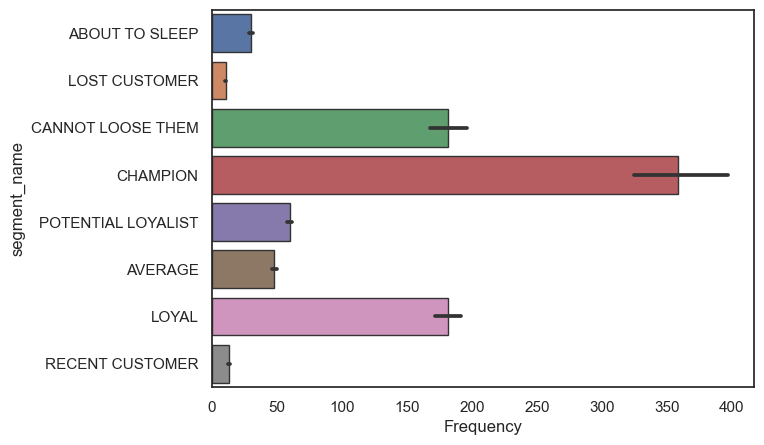

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
fig = plt.figure(figsize=(7,5), dpi= 100)
sns.set(style='white')

sns.barplot(x = "Frequency", y = "segment_name", data = rfm_segmentation ,
                 errcolor=".2", edgecolor=".2")
            
plt.show()

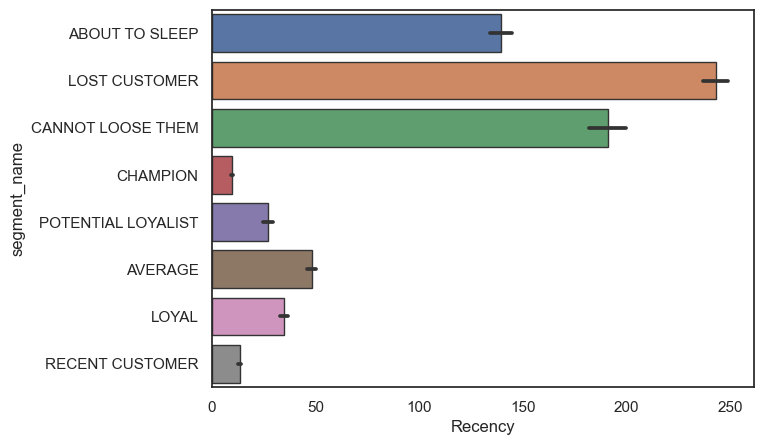

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
fig = plt.figure(figsize=(7,5), dpi= 100)
sns.set(style='white')

sns.barplot(x = "Recency", y = "segment_name", data = rfm_segmentation ,
                 errcolor=".2", edgecolor=".2")
            
plt.show()